Tabla de Frecuencia de Climas:
   Clima  Frecuencia  Frecuencia Relativa  Frecuencia Acumulada
Lluvioso         113                0.226                   113
 Soleado         105                0.210                   218
    Frío          97                0.194                   315
Caluroso          93                0.186                   408
 Nublado          92                0.184                   500


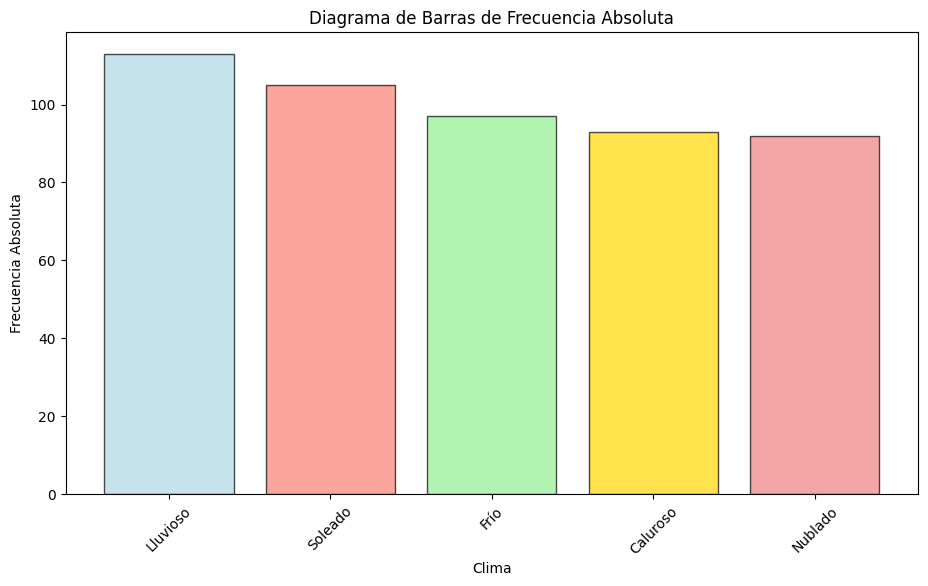

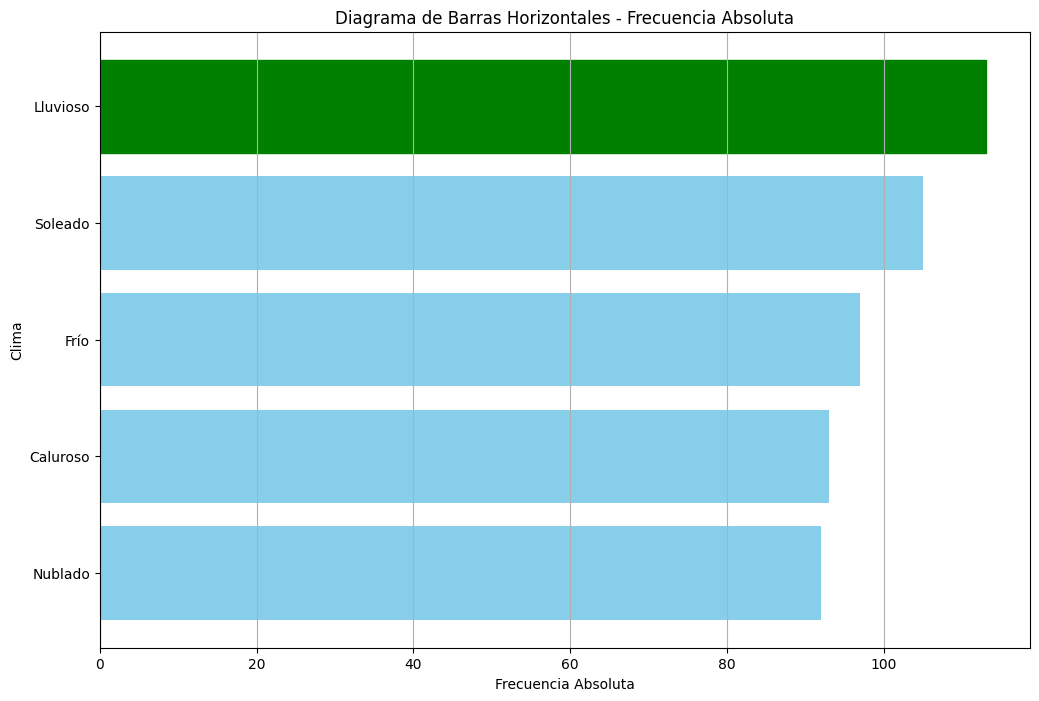

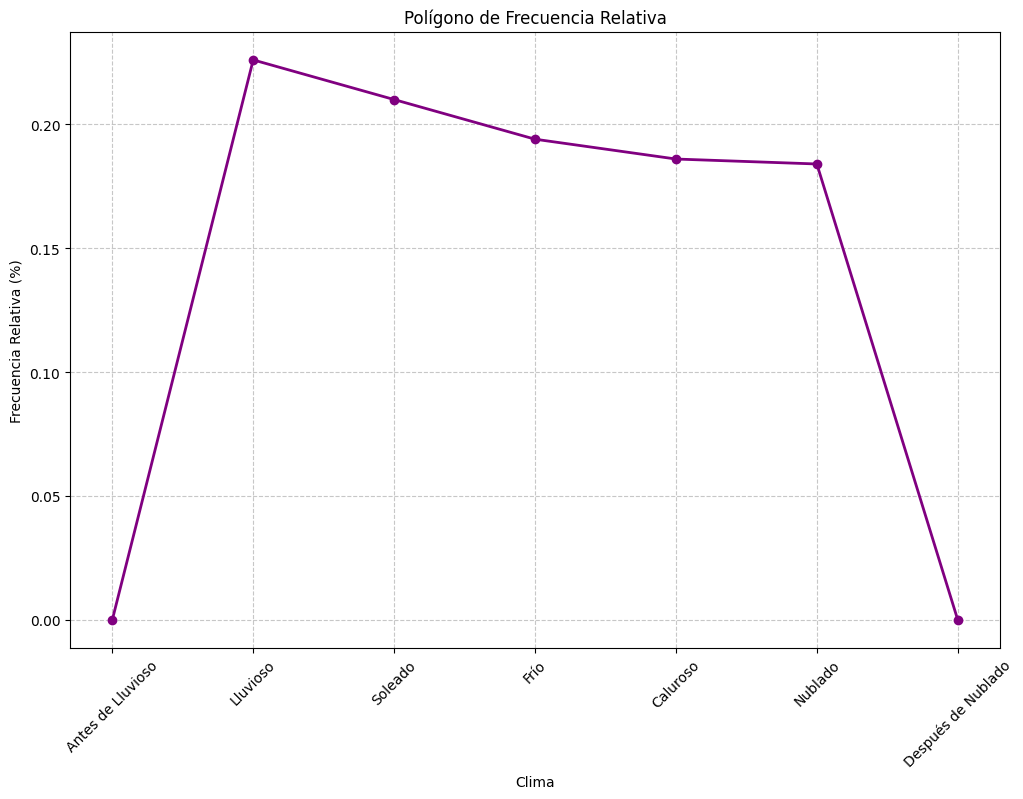

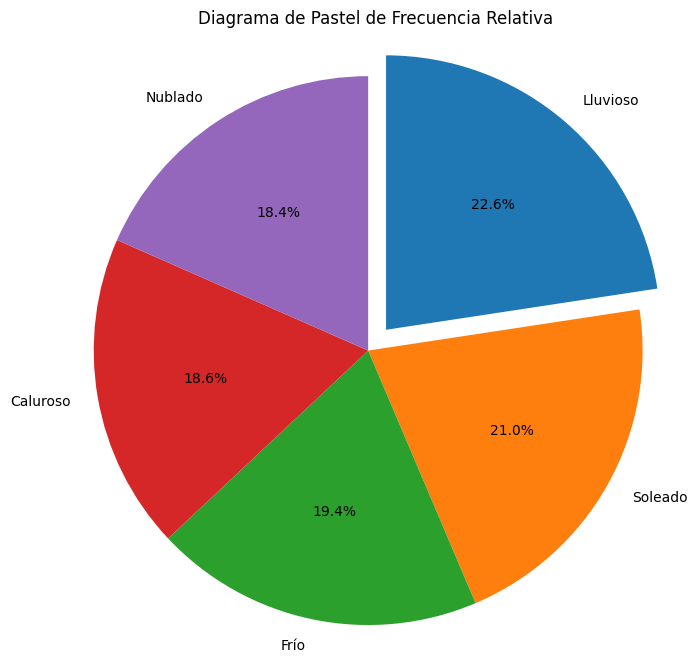

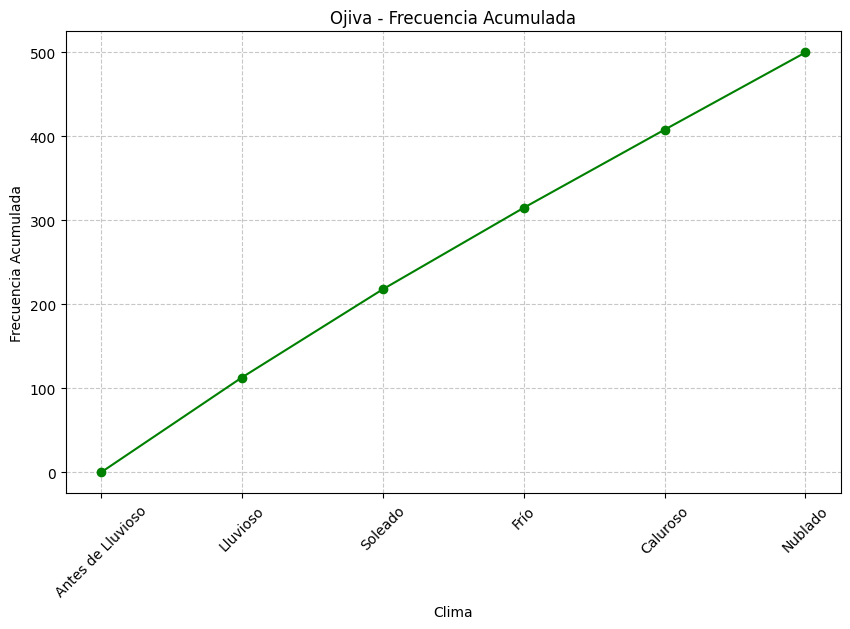

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generar 500 datos aleatorios de climas
climas = ['Soleado', 'Nublado', 'Lluvioso', 'Frío', 'Caluroso']
data = np.random.choice(climas, size=500)

# Crear un DataFrame con variable categórica
df = pd.DataFrame(data, columns=['Clima'])
df['Clima'] = pd.Categorical(df['Clima'], categories=climas)

# Calcular la frecuencia absoluta
frecuencia_absoluta = df['Clima'].value_counts().reset_index()
frecuencia_absoluta.columns = ['Clima', 'Frecuencia']

# Calcular la frecuencia relativa (en fracción)
frecuencia_absoluta['Frecuencia Relativa'] = frecuencia_absoluta['Frecuencia'] / frecuencia_absoluta['Frecuencia'].sum()

# Calcular la frecuencia acumulada
frecuencia_absoluta['Frecuencia Acumulada'] = frecuencia_absoluta['Frecuencia'].cumsum()

# Ordenar por frecuencia descendente
frecuencia_absoluta.sort_values(by='Frecuencia', ascending=False, inplace=True)

# Mostrar la tabla de frecuencias
print("Tabla de Frecuencia de Climas:")
print(frecuencia_absoluta.to_string(index=False))

# Graficar diagrama de barras para frecuencia absoluta
plt.figure(figsize=(11, 6))
colores = ['lightblue', 'salmon', 'lightgreen', 'gold', 'lightcoral']
plt.bar(frecuencia_absoluta['Clima'], frecuencia_absoluta['Frecuencia'], color=colores[:len(frecuencia_absoluta)], 
        alpha=0.7, edgecolor='black', width=0.8)
plt.title('Diagrama de Barras de Frecuencia Absoluta')
plt.xlabel('Clima')
plt.ylabel('Frecuencia Absoluta')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 8))
# Ordenar de mayor a menor y revertir el orden para que la mayor este abajo
sorted_freq = frecuencia_absoluta.sort_values(by='Frecuencia', ascending=False)
indices_reversed = sorted_freq['Clima'][::-1]
values_reversed = sorted_freq['Frecuencia'][::-1]
# Crear barras
bars = plt.barh(indices_reversed, values_reversed, color='skyblue')
# Resaltar la barra más grande (que estara en la parte inferior)
max_freq = sorted_freq['Frecuencia'].max()
for bar in bars:
    if bar.get_width() == max_freq:
        bar.set_color('green')  # Resaltar la barra mas grande en verde
plt.title('Diagrama de Barras Horizontales - Frecuencia Absoluta')
plt.xlabel('Frecuencia Absoluta')
plt.ylabel('Clima')
plt.grid(axis='x')
plt.show()

# Poligono de frecuencia
plt.figure(figsize=(12, 8))
# Obtener el primer y último clima para los puntos extendidos
primer_clima = frecuencia_absoluta['Clima'].iloc[0]
ultimo_clima = frecuencia_absoluta['Clima'].iloc[-1]
extended_indices = ['Antes de ' + primer_clima] + frecuencia_absoluta['Clima'].tolist() + ['Después de ' + ultimo_clima]
extended_values = [0] + frecuencia_absoluta['Frecuencia Relativa'].tolist() + [0]
plt.plot(extended_indices, extended_values, marker='o', color='purple', linestyle='-', linewidth=2)
plt.title('Polígono de Frecuencia Relativa')
plt.xlabel('Clima')
plt.ylabel('Frecuencia Relativa (%)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Graficar diagrama de pastel para frecuencia relativa
plt.figure(figsize=(8, 8))
# Filtrar valores válidos
valid_indices = frecuencia_absoluta.loc[frecuencia_absoluta['Frecuencia Relativa'] > 0].sort_values(by='Frecuencia Relativa', ascending=False)
valid_frec_rel = valid_indices['Frecuencia Relativa']
labels = valid_indices['Clima']

explode = [0.1 if i == 0 else 0 for i in range(len(valid_frec_rel))]
plt.pie(valid_frec_rel, labels=labels , autopct='%1.1f%%', startangle=90, explode=explode, counterclock=False)
plt.title('Diagrama de Pastel de Frecuencia Relativa')
plt.axis('equal')
plt.show()

# Graficar ojiva para frecuencia acumulada
plt.figure(figsize=(10, 6))
# Obtener el primer clima para el punto inicial ficticio
primer_clima = frecuencia_absoluta['Clima'].iloc[0]
extended_climas = ['Antes de ' + primer_clima] + frecuencia_absoluta['Clima'].tolist()
extended_acumulada = [0] + frecuencia_absoluta['Frecuencia Acumulada'].tolist()
plt.plot(extended_climas, extended_acumulada, marker='o', color='green', linestyle='-')
plt.title('Ojiva - Frecuencia Acumulada')
plt.xlabel('Clima')
plt.ylabel('Frecuencia Acumulada')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Alumno: Badillo Morales Nicole Alondra 
Matricula: 240110651
[Índice](index.ipynb)